# RSE Group Leaders Survey 2023

In [13]:
import sys
import importlib
import numpy as np
import pandas as pd
sys.path.append('../src/data/')
import util as util

In [2]:
setup, dset = util.read_setup_and_data()
validated = util.validate_setup_and_data(setup, dset)

if not validated:
    print("ERROR: setup and data files are not valid.")
    raise KeyboardInterrupt

# number of respondents and questions
nrsps_raw = dset.shape[0]
nqsts = dset.shape[1]

# replace dset columns with setup keys
dset.columns = setup.keys()

# remove respondents who did not agree to share data
dset = dset[dset.q1 == "Yes"]
nrsps = dset.shape[0]

# process checkbox responses
dset = util.process_checkboxes(dset, setup)

# save the processed dataset
util.save_data(dset)

# print out some information
print(f"Questions  : {nqsts}")
print(f"Respondents - all           : {nrsps_raw}")
print(f"Respondents - agreed sharing: {nrsps}")


Questions  : 20
Respondents - all           : 36
Respondents - agreed sharing: 36


## Overview of the answers


Q4: Is your group:

                                                                                      count  percentage
The main RSE Group for the university/research organisation                              26          72
An RSE Group for a specific subset/group within the university/research organisation      8          22
An RSE Group for multiple universities/research organisations                             4          11


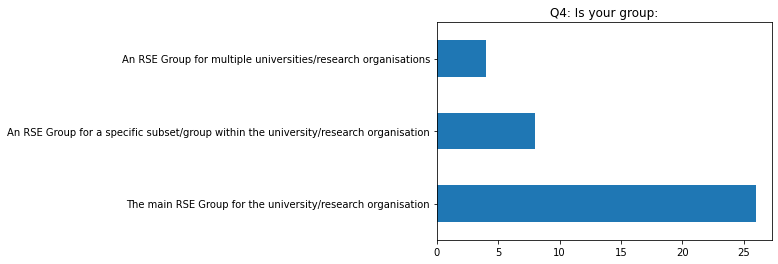


Q7: Where is your group based?

                                                    count  percentage
IT/Research IT                                         14          39
Other                                                   9          25
Academic Department - supporting whole Institution      5          14
Academic Department - supporting a specific domain      4          11
Independent Institute/Facility                          4          11


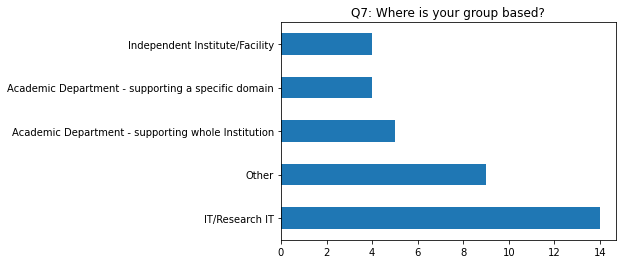


Q15: Please rate the level of demand for your Group's services

                                                      count  percentage
Demand greater than the number of RSEs                   17          47
Demand significantly greater than the number of RSEs     14          39
Demand is met by the number of RSEs                       4          11
Demand is less than the number of RSEs                    0           0
Demand is significantly less than the number of RSEs      0           0


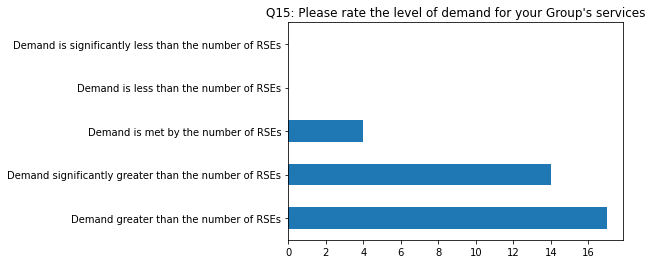


Q16: If demand for your services outstrips the number of RSEs, what causes this situation?

                                                                                                                 count  percentage
Hiring processes are long-winded, so we're always behind the demand curve                                           21          58
We lack the funding to make new positions available                                                                 12          33
We can attract RSEs, but can't hire them because the salary and other benefits we can offer are not competitive      9          25
We have funding, but we can't find RSEs to hire                                                                      7          19


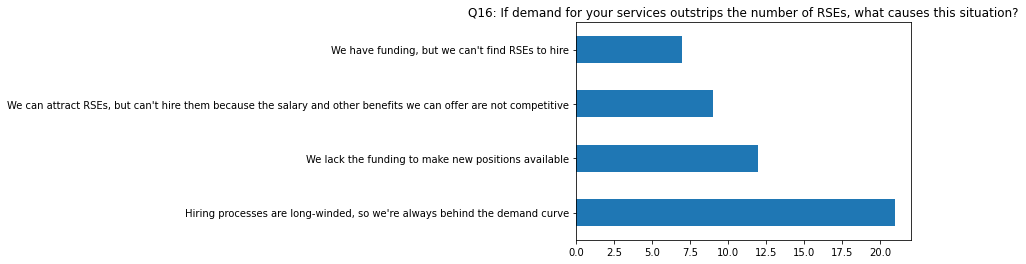

In [55]:
importlib.reload(util)
import matplotlib.pyplot as plt

for qst in setup.keys():
    if setup[qst]['type'] == 'checkbox':
        dset_stats = util.derive_checkbox_stats(dset, setup, qst)

        # print the question and the statistics
        title = f"{qst.upper()}: {setup[qst]['text']}"
        print(f"\n{title}\n")
        pd.set_option('precision', 0)
        print(dset_stats.to_string())

        # plot barcharts
        dset_stats.plot.barh(y='count', 
                             legend=False, 
                             title=title
                             )
        plt.show()